In [1]:
from __future__ import division, print_function
import numpy as np
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=6, suppress=True)
%load_ext autoreload
%autoreload 2
import os
from IPython.display import Image, SVG
#from IPython.display import display, HTML
from IPython.core.display import HTML
figpath = './files' #'figures/'
ext = '.png'
ext = None
ext = '.svg'
height = 700
phi = .5*np.sqrt(5) + .5 # useful ratio for figures

fig_width_pt = int(height*phi)  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

import matplotlib 
fontsize = 20
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 

embed = True
embed = False
opts = dict(retina=True, unconfined=False,  embed=embed)

def show_video(filename, height=height, width=fig_width_pt): 
    return HTML(data='<table border="0" VALIGN="center" bgcolor="white" height={height} /><tr style="vertical-align:middle"><td width="{width}" style="text-align:center; vertical-align:middle" bgcolor="white" /><video src="{filename}" loop autoplay width="width" height="height"></td></tr></table>'.format(filename=filename, height=height, width=width))

def show_image(filename, height=height, width=None):
    if width is None: width=int(height*phi)
    return HTML(data='<table border="0" VALIGN="center" bgcolor="white" height={height} /><tr style="vertical-align:middle"><td width="{width}" style="text-align:center; vertical-align:middle" bgcolor="white" /><img src="{filename}" style="width: 100%" /></td></tr></table>'.format(filename=filename, height=height, width=width))


# Recruiting different population ratios in V1 using MotionClouds' orientation components
## InViBe's Journal Club -  https://intranet.int.univ-amu.fr/fr/invibe/journalclub 

 * (sep 26th) Laurent : introduction https://laurentperrinet.github.io/sciblog/files/2016-09-26_Perrinet16journalClub/2016-09-26_Perrinet16journalClub.slides.html
 * (oct 3rd) Frédo : Origin and Function of Tuning Diversity in Macaque Visual Cortex by Robbe L.T. Goris, Eero P. Simoncelli, J. Anthony Movshon - http://www.sciencedirect.com/science/article/pii/S0896627315008752
 * (oct 10th) : free slot (IRM?)
 * (oct 17th) : Ivo
 * (oct 24th and 31st) : break
 * (nov 7th) Christopher : psychophysics

See https://neuralensemble.github.io/MotionClouds/posts/orientation.html

Re-compile this presentation using https://laurentperrinet.github.io/sciblog/files/2016-09-26_Perrinet16journalClub/2016-09-26_Perrinet16journalClub.ipynb 

* a new serie of JCs: 
* 2 available slots


# manipulating the bandwidth in MotionClouds

```python

import numpy as np
import MotionClouds as mc
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)

name = 'balaV1'

N_X = fx.shape[0]
width = 29.7*256/1050
sf_0 = 4.*width/N_X
B_V = 2.5     # BW temporal frequency (speed plane thickness)
B_sf = sf_0   # BW spatial frequency
theta = 0.0   # Central orientation
B_theta_low, B_theta_high = np.pi/32, 2*np.pi 
B_V = 0.5
seed=12234565

mc1 = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, theta=theta, B_theta=B_theta_low)

```

In [2]:
import numpy as np
import MotionClouds as mc
mc.figpath = figpath
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)

name = 'balaV1'

N_X = fx.shape[0]
width = 29.7*256/1050
sf_0 = 4.*width/N_X
B_V = 2.5     # BW temporal frequency (speed plane thickness)
B_sf = sf_0   # BW spatial frequency
theta = 0.0   # Central orientation
B_theta_low, B_theta_high = np.pi/32, 2*np.pi 
B_V = 0.5
seed=12234565

mc1 = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, theta=theta, B_theta=B_theta_low)
name_ = name + '_1'
mc.figures(mc1, name_, seed=seed)
mc.in_show_video(name_, figpath=figpath)

In [3]:
mc2 = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, theta=theta, B_theta=B_theta_high)
name_ = name + '_2'
mc.figures(mc2, name_, seed=seed)
mc.in_show_video(name_, figpath=figpath)

* Basic effect: whenever one changes bandwidth either you detect the mean orientation or not

Loi de Von Mises (loi normale circulaire) telle que $f(\theta+\pi) = f(\theta)$ définie par :

$$
f(\theta) \propto e^{\kappa{cos(2(\theta - m))}}
$$
Par analogie avec la déviation standard d'une loi Gaussienne, on définit $\kappa = \frac {1}{\sigma^{2}}$.


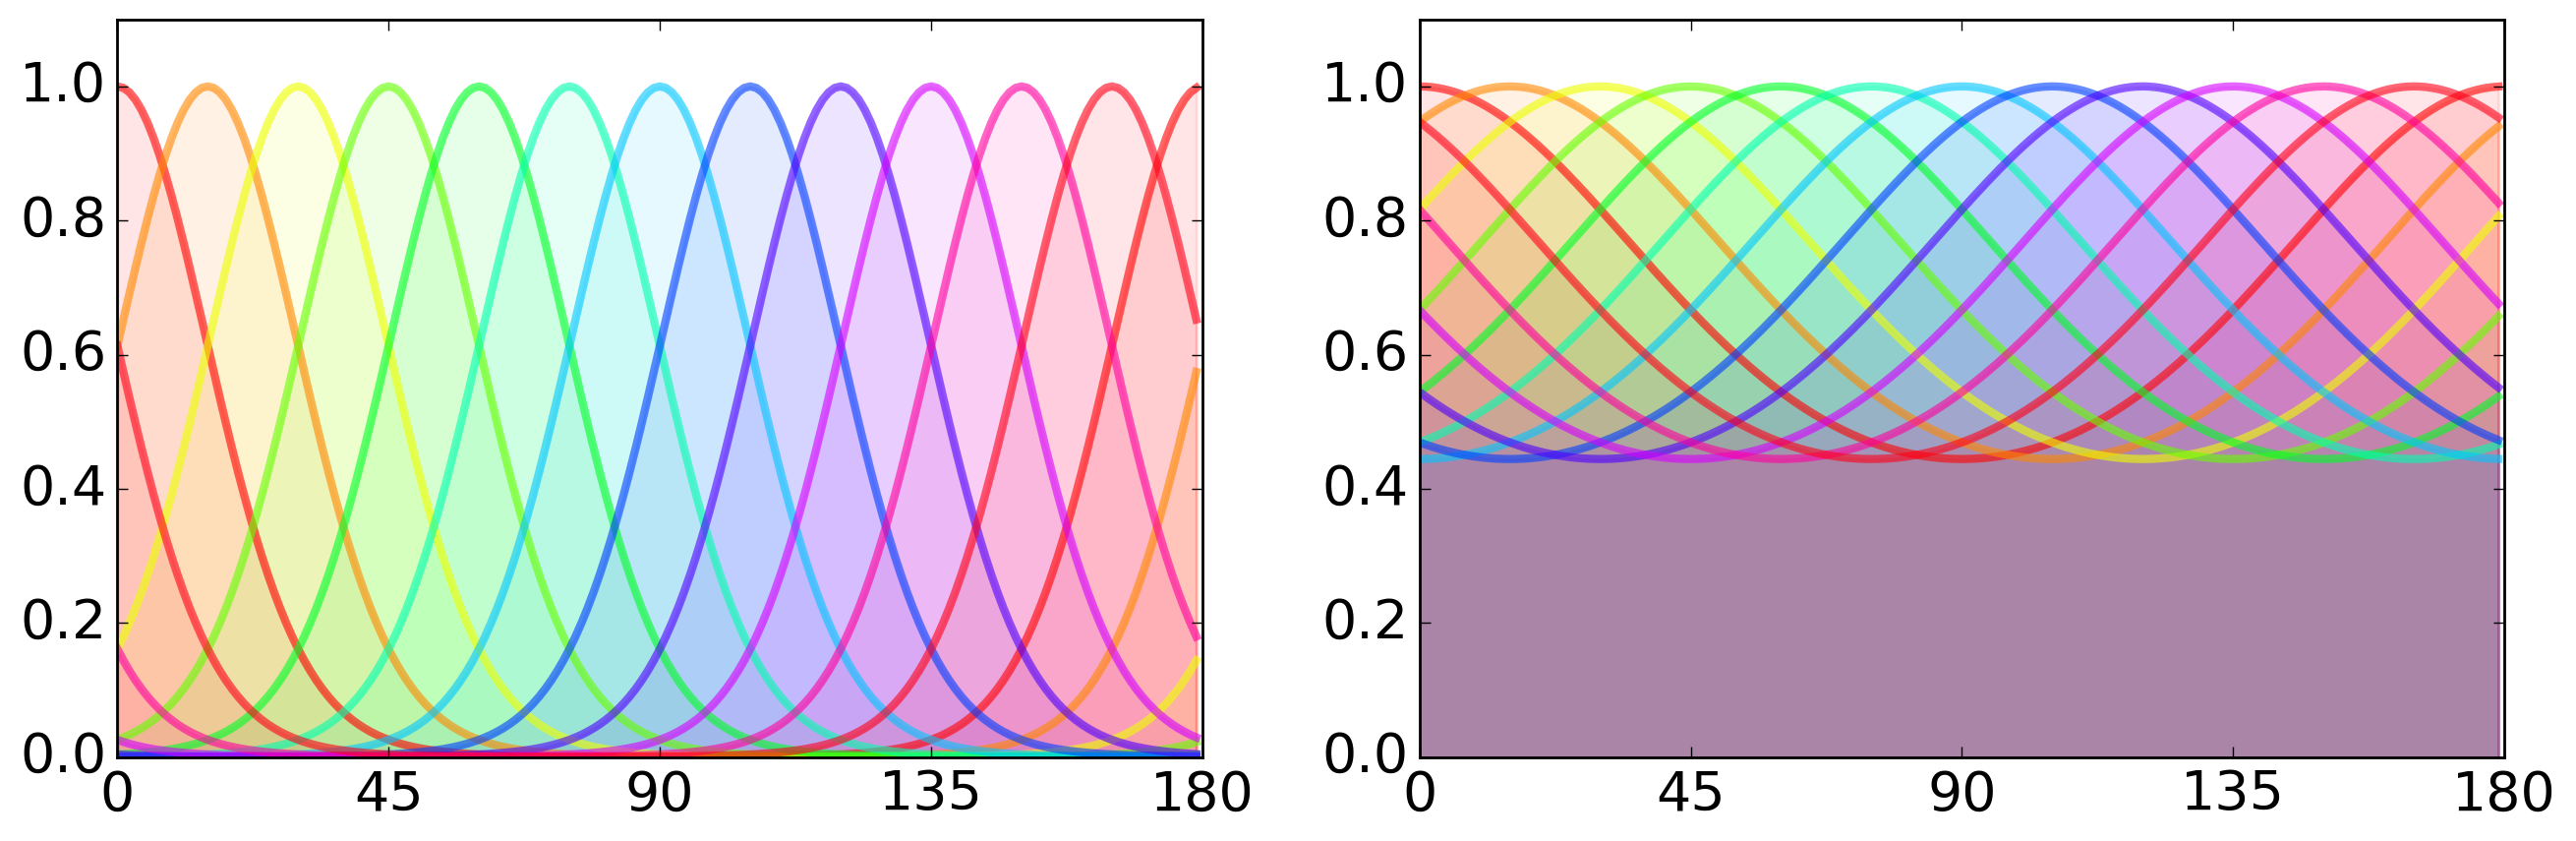

In [4]:

def envelope(th, theta, B_theta):
    if B_theta==np.inf:
        env = np.ones_like(th) 
    elif B_theta==0:
        env = np.zeros_like(th)
        env[np.argmin(th < theta)] = 1.
    else:
        env = np.exp((np.cos(2*(th-theta))-1)/4/B_theta**2)
    return env/env.max()        

N_theta = 12
bins = 180
th = np.linspace(0, np.pi, bins, endpoint=False)
fig, axs = plt.subplots(1, 2, figsize=(fig_width, fig_width/phi/2))
for i, B_theta_ in enumerate([np.pi/12, np.pi/4]):#[0, np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, np.inf]:
    for theta, color in zip(np.linspace(0, np.pi, N_theta, endpoint=False), 
                            [plt.cm.hsv(h) for h in np.linspace(0, 1, N_theta)]):
        axs[i].plot(th*180/np.pi, envelope(th, theta, B_theta_), alpha=.6, color=color, lw=3)
        axs[i].fill_between(th*180/np.pi, 0, envelope(th, theta, B_theta_), alpha=.1, color=color)
    axs[i].set_xlim([0, 180])
    axs[i].set_ylim([0, 1.1])
    axs[i].set_xticks(np.linspace(0, 180, 5, endpoint=True) )#to specify number of tick…
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)

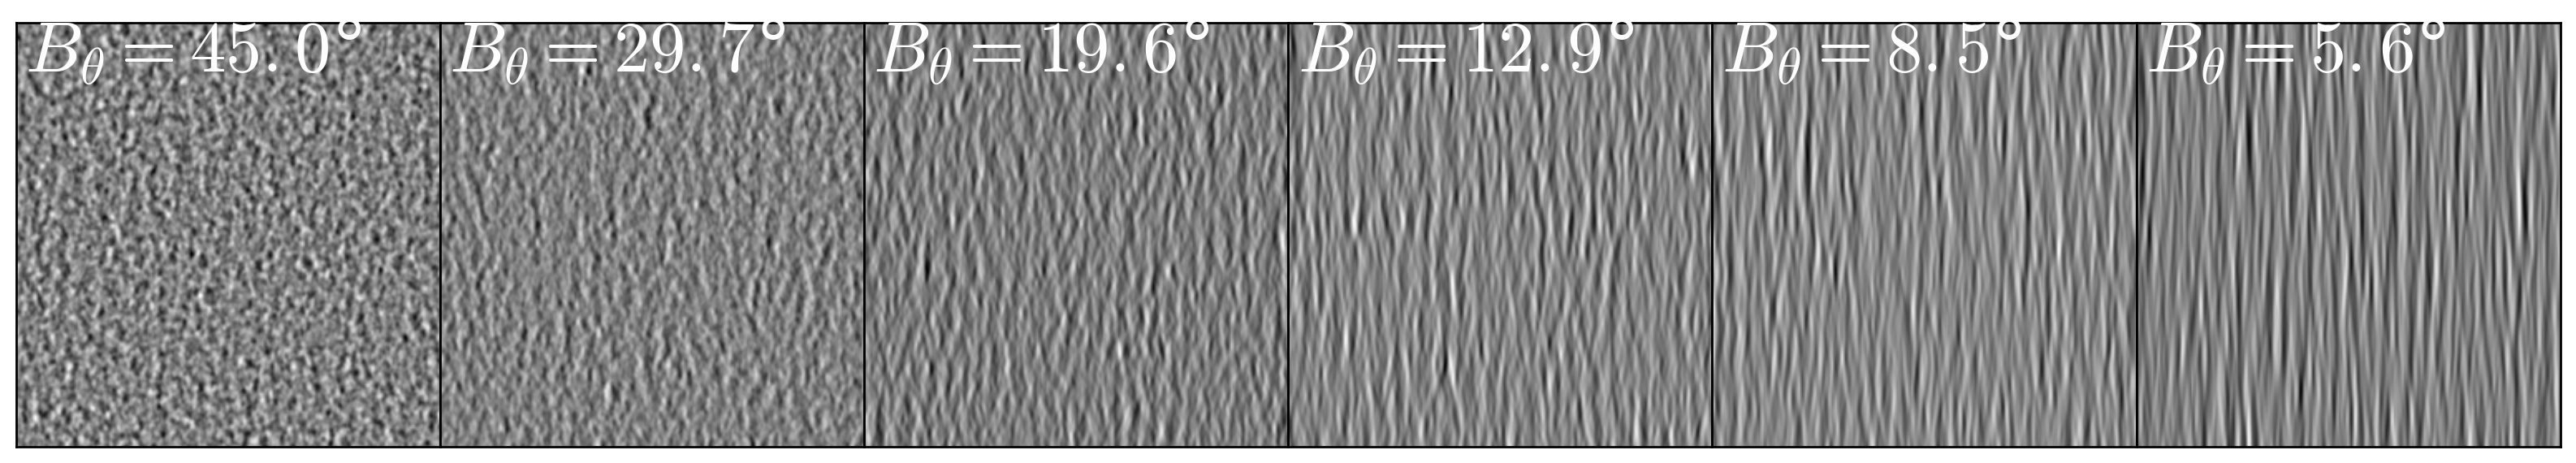

In [5]:
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, 1)


N_theta = 6
bw_values = np.pi*np.logspace(-2, -5, N_theta, base=2)


fig, axs = plt.subplots(1, N_theta, figsize=(fig_width, fig_width/N_theta))
for i_ax, B_theta in enumerate(bw_values):
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0.,  
                                         theta=np.pi/2, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
                
    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

## exploring differentsP bandwidths by smoothly varying $B_\theta$

In [6]:
name = 'smooth'
theta_phi = np.pi * (3 - np.sqrt(5)) # https://en.wikipedia.org/wiki/Golden_angle
if mc.check_if_anim_exist(name):
    fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame//2)
    smooth = (ft - ft.min())/(ft.max() - ft.min()) # smoothly progress from 0. to 1.
    seed = 123456

    B_theta_ = B_theta_high*2.**-np.arange(5)
    B_theta_ = np.hstack((B_theta_, B_theta_[1:-1][::-1]))
    print('Smoothly changing B_theta along', B_theta_, '... and so on...')

    im = np.empty(shape=(mc.N_X, mc.N_Y, 0))
    N = len(B_theta_)
    im =  np.empty(shape=(mc.N_X, mc.N_Y, 0))

    for i_theta, B_theta in enumerate(B_theta_):
        im_old = mc.random_cloud(mc.envelope_gabor(fx, fy, ft, theta=theta_phi, B_theta=B_theta, V_X=0), seed=seed)
        im_new = mc.random_cloud(mc.envelope_gabor(fx, fy, ft, theta=theta_phi, B_theta=B_theta_[(i_theta+1) % N], V_X=0), seed=seed)
        im = np.concatenate((im, (1.-smooth)*im_old+smooth*im_new), axis=-1)

    mc.anim_save(mc.rectif(im), os.path.join(mc.figpath, name))
#mc.in_show_video(name, figpath=figpath)
show_video(os.path.join(mc.figpath, name), height=.8*height, width=.8*height)

""


# The problem of detecting orientations : OB V1

* check out https://github.com/laurentperrinet/OBV1


In [7]:
show_image('https://raw.githubusercontent.com/laurentperrinet/OBV1/master/figs/Ben_Kenobi.png', height=height*.8)

""


In [8]:
show_image('https://raw.githubusercontent.com/laurentperrinet/OBV1/master/figs/Fig-1-a-Model-Schematic-The-model-consists-of-the-three-major-subsystems-retina.png', height=.4*height)

""


* simple cells in V1

In [9]:
show_image('https://github.com/laurentperrinet/OBV1/raw/master/figs/pasturel_result.png', height=.4*height)

""


* prediction from a linear model : work from Chloé Pasturel

In [10]:
show_image('https://raw.githubusercontent.com/laurentperrinet/OBV1/master/figs/nn3977-F1.jpg', height=height*.8)

""


''The compass within'',  Nathan W Schultheiss & A David Redish (Nature Neuroscience 18, 482–483 (2015) doi:10.1038/nn.3977 http://www.nature.com/neuro/journal/v18/n4/full/nn.3977.html)

In [11]:
show_image('https://raw.githubusercontent.com/laurentperrinet/OBV1/master/figs/future_model.png', height=height)

""


* The specific population of eight spatiotemporal RFs that optimally encodes information for speed estimation is shown in Fig. 3a (Supplementary Fig. 2). Increasing the number of RFs beyond eight provides relatively little additional information
* c:  The information about speed is primarily contained in the covariance of the joint RF responses. As speed increases from zero, the distributions overlap more, suggesting that speed discrimination thresholds will increase with speed, similar to Weber’s law for speed discrimination.
* Note that the conditional response distributions are Gaussian in part because of contrast normalization21, 31; without normalization the distributions tend to be more kurtotic than Gaussian distributions21, 31, 32.
http://www.nature.com.gate1.inist.fr/ncomms/2015/150804/ncomms8900/images/ncomms8900-m2.gif
could it be that this is linked to homeostasis?

* a neural circuit that computes a weighted sum of squared RF responses and then passes the sum through an accelerating nonlinearity (Fig. 3a) could create a unit with responses that are proportional to the likelihood of the joint RF response (Fig. 2c) for a particular speed

In [12]:
show_image('https://raw.githubusercontent.com/laurentperrinet/OBV1/master/figs/ringRecurrent.png', height=height)

""


# Recruiting different population ratios in V1 using MotionClouds' orientation components
## questions and comments

* there may be links with models in texture discrimination (e.g. back pocket model from Landy), models with an association field, check-out TextureNet and al
* interaction with eye movements, e.g. Marisa Carrasco : sharpening of the tuning function at the instant of the saccade ( http://psych.nyu.edu/carrascolab/publications/LiBarbotCarrasco2016.pdf )
* effects of size of features (e.g. wrt to receptive field size)

# generating the slide show

In [13]:
%%writefile reveal_settings.tpl
{%- extends 'slides_reveal.tpl' -%}

{% block input_group -%}
<div class="input_hidden">
{{ super() }}
</div>
{% endblock input_group %}

{% block prompt -%}
<div class="output_prompt">
{{ super() }}
</div>
{% endblock prompt %}

{%- block header -%}
{{ super() }}
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.10.2/jquery.min.js"></script>

<style type="text/css">
.input_hidden {
  display: none;
}
.output_prompt {
  display: none;
}
table { 
   border : 0px
}
.reveal .slides section>* {
        margin-left: 0;
        margin-right: 0;
    }
</style>
{%- endblock header -%}

{% block body %}
{{ super() }}

<script>

Reveal.initialize({

    // The "normal" size of the presentation, aspect ratio will be preserved
    // when the presentation is scaled to fit different resolutions. Can be
    // specified using percentage units.
    width: 160%,
    height: 100%,

    // Factor of the display size that should remain empty around the content
    margin: 0.,

    // Bounds for smallest/largest possible scale to apply to content
    // minScale: 0.2,
    // maxScale: 1.5

    // Display controls in the bottom right corner
    controls: false,

    // Display a presentation progress bar
    progress: true,

    // Push each slide change to the browser history
    //history: false,

    // Vertical centering of slides
    center: true,

    // Enables touch navigation on devices with touch input
    touch: true,

    // Enable keyboard shortcuts for navigation
    //keyboard: true,

    // Enable the slide overview mode
    overview: true,

    // Loop the presentation
    //loop: false,

    // Change the presentation direction to be RTL
    //rtl: false,

    // Number of milliseconds between automatically proceeding to the
    // next slide, disabled when set to 0, this value can be overwritten
    // by using a data-autoslide attribute on your slides
    //autoSlide: 0,

    // Enable slide navigation via mouse wheel
    //mouseWheel: false,

    // Parallax background image
    // parallaxBackgroundImage: 'https://s3.amazonaws.com/hakim-static/reveal-js/reveal-parallax-1.jpg', // e.g. "https://s3.amazonaws.com/hakim-static/reveal-js/reveal-parallax-1.jpg"

    // Parallax background size
    // parallaxBackgroundSize: '2100px 900px', // CSS syntax, e.g. "2100px 900px" - currently only pixels are supported (don't use % or auto)

    // This slide transition gives best results:
    transition: 'fade', // default/cube/page/concave/zoom/linear/fade/none

    // Transition speed
    transitionSpeed: 'slow', // default/fast/slow

    // Transition style for full page backgrounds
    backgroundTransition: 'fade', // default/linear/none

    // Theme
    theme: 'White', // available themes are in /css/theme

});

</script>

{% endblock body %}

Overwriting reveal_settings.tpl


In [14]:
# TODO: make sure this file is saved first
! jupyter nbconvert 2016-09-26_Perrinet16journalClub.ipynb --reveal-prefix=http://lab.hakim.se/reveal-js/ --template reveal_settings.tpl   --to slides

[NbConvertApp] Converting notebook 2016-09-26_Perrinet16journalClub.ipynb to slides
[NbConvertApp] Writing 2654275 bytes to 2016-09-26_Perrinet16journalClub.slides.html


In [15]:
! open 2016-09-26_Perrinet16journalClub.slides.html

In [16]:
!rsync -av --delete --exclude=.ipynb_checkpoints ../2016-09-26_Perrinet16journalClub ~/pool/libs/blog/invibe/files/

sending incremental file list
rsync: mkdir "/Users/lolo/pool/libs/blog/invibe/files" failed: No such file or directory (2)
rsync error: error in file IO (code 11) at main.c(707) [Receiver=3.1.2]
